<a href="https://colab.research.google.com/github/ubadakhan/stock-market-price-prediction/blob/main/future_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2: Predict Future Stock Prices (Short-Term)

Objective:

Use historical stock data to predict the next day's closing price.

Dataset:

Stock market data from Yahoo Finance (retrieved using the yfinance Python
library)

Instructions:

● Select a stock (e.g., Apple, Tesla).

● Load historical data using the yfinance library.

● Use features like Open, High, Low, and Volume to predict the next Close price.

● Train a Linear Regression or Random Forest model.

● Plot actual vs predicted closing prices for comparison.

Skills:

● Time series data handling

● Regression modeling

In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, root_mean_squared_error
import yfinance as yf

In [3]:
#load historical data of apple
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start = '2024-01-01', end = '2025-06-09')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500


In [5]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [6]:
data = data.xs('AAPL', axis=1, level='Ticker')
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [7]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
2024-01-03,182.910538,184.528693,182.096492,182.880757,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862823,181.431339,178.860172,180.666948,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500


In [8]:
data['next_close'] = data['Close'].shift(-1)
data = data[:-1]

features = ['Open', 'High', 'Low', 'Volume']
x = data[features]
y = data['next_close']



In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [10]:
model = RandomForestRegressor( max_features=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [11]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MSE: {mse:.2f}')

RMSE: 8.18
MSE: 66.91


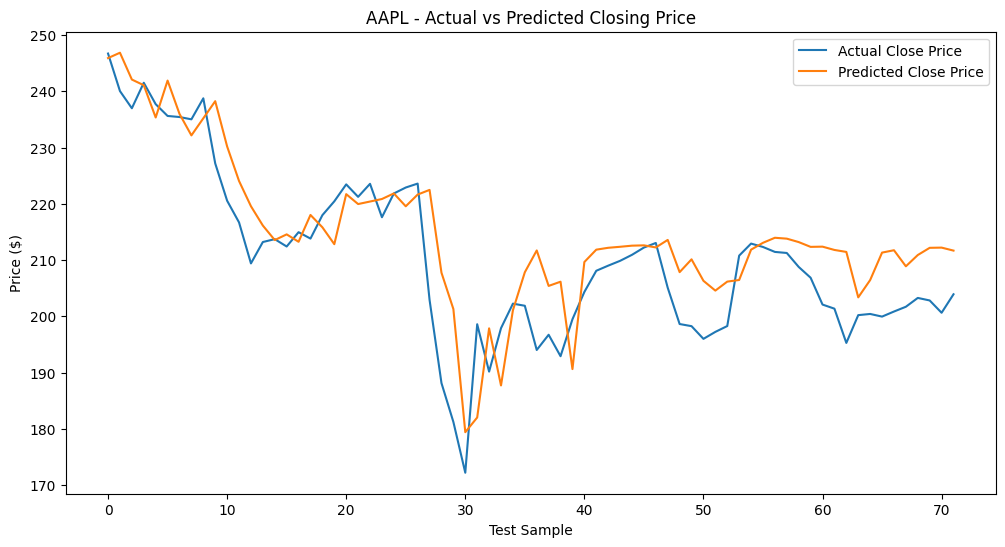

In [12]:
# Plot actual vs predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title(f'{stock_symbol} - Actual vs Predicted Closing Price')
plt.xlabel('Test Sample')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [14]:
print('RMSE: ', root_mean_squared_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

RMSE:  6.347100417342324
MSE:  40.28568370782711


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [16]:
model1 = LinearRegression()
model1.fit(x_train_scaled, y_train)
y_pred1 = model1.predict(x_test_scaled)

In [17]:
print(f'RMSE: {root_mean_squared_error(y_test, y_pred1):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred1):.2f}')

RMSE: 13.92
MSE: 193.89


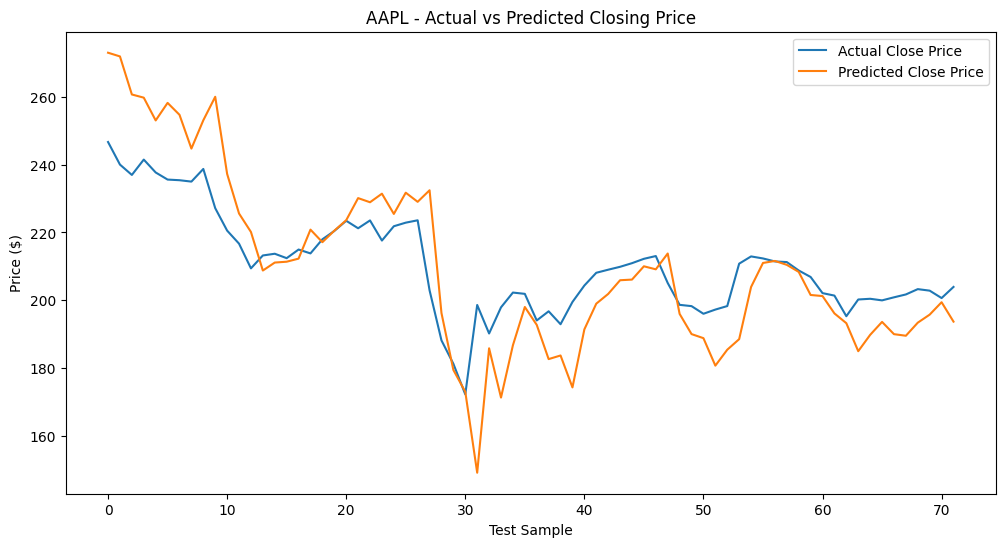

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(y_pred1, label='Predicted Close Price')
plt.title(f'{stock_symbol} - Actual vs Predicted Closing Price')
plt.xlabel('Test Sample')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [22]:
def predict_next_close(model, new_data, features):
    try:
        unseen_df = pd.DataFrame([new_data], columns=features)

        prediction = model.predict(unseen_df)
        return prediction[0]
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

new_data = {'Open': 150.25, 'High': 152.50, 'Low': 149.80, 'Volume': 1000000}
predicted_price = predict_next_close(model, new_data, features)
print(f"Predicted Next Close: {predicted_price}")

Predicted Next Close: 152.8220223779282
